In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/train.csv')
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [2]:
#checking null data if there is any.

data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

## EDA

In [10]:
# How many records and features do we have? 
# Which of the features are our target variables? 

print('We have %d features and %d records.' % (data.shape[1], data.shape[0]))
targets = list(data.columns[2:])
targets.append('clean_comment')
print('\nOur Target Columns: ' + ', '.join(targets))


negative_targets = list(data.columns[2:])
print('\nOur Negative Target Columns: ' + ', '.join(negative_targets))

We have 8 features and 159571 records.

Our Target Columns: malignant, highly_malignant, rude, threat, abuse, loathe, clean_comment

Our Negative Target Columns: malignant, highly_malignant, rude, threat, abuse, loathe


In [21]:
df_targets = data.iloc[:,2:]
df_targets_with_clean = data.iloc[:,2:]

toxic_rows = df_targets_with_clean.sum(axis=1)
is_clean = (toxic_rows == 0)

# Create overall any_label feature
df_targets_with_clean['clean_comment'] = is_clean

df_targets_with_clean.head()

,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,True
2,0,0,0,0,0,0,True
3,0,0,0,0,0,0,True
4,0,0,0,0,0,0,True


## Number of comment records with each label

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'clean_comment']
{'malignant': 15294, 'highly_malignant': 1595, 'rude': 8449, 'threat': 478, 'abuse': 7877, 'loathe': 1405, 'clean_comment': 143346}


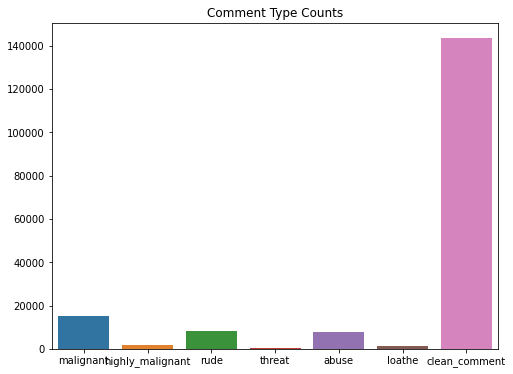

In [23]:
print(targets)

count_dic = {}
for comment_type in targets:
    count_dic[comment_type] = len(df_targets[(df_targets_with_clean[comment_type]==1)])

print(count_dic)

plt.figure('Comment Type Counts', figsize=[8,6])
plt.title('Comment Type Counts')
sns.barplot(x=list(count_dic.keys()), y=list(count_dic.values()))
plt.show()

{'malignant': 15294, 'highly_malignant': 1595, 'rude': 8449, 'threat': 478, 'abuse': 7877, 'loathe': 1405}


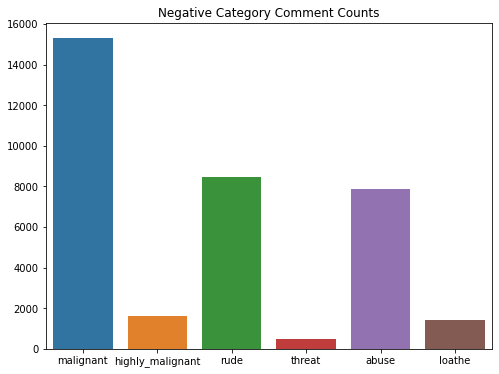

In [24]:
# Only the Negative Category Comments 

count_dic = {}
for comment_type in negative_targets:
    count_dic[comment_type] = len(df_targets[(df_targets[comment_type]==1)])

print(count_dic)

plt.figure('Negative Category Comment Counts', figsize=[8,6])
plt.title('Negative Category Comment Counts')
sns.barplot(x=list(count_dic.keys()), y=list(count_dic.values()))
plt.show()


# Correlation between the target types on a heatmap

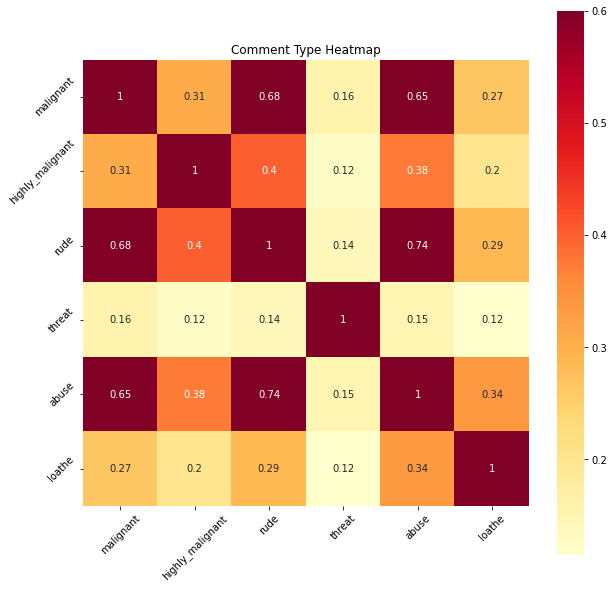

In [25]:

#data[targets].copy()

plt.figure('heatmap', figsize=[10,10])
plt.title('Comment Type Heatmap')
df_corr = df_targets.corr()
sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.show()


In [26]:
# Comment samples from each category

for t in targets:
    print("Label: {} ============================================================".format(t))
    b = np.where(df_targets_with_clean[t]==1)[0]
    selection = np.random.choice(b, 3)
    for s in selection:
        print(data.comment_text.loc[s])
        print("++++++++++++")
    print()
    


Label: malignant ============================================================
"

 Yo there! 

You are a useless and fucking douchebag. Go fuck yourself, you are a disgrace to wikipedia!!!! 
YOU, SIR, ARE A BALLSACK!  You think you are so much smarter than everyone else!  Why do you think you are so smart!  I wish you would leave the Wikipedia!  I can't stand the way you BS the man!

In the mean time, I guess I've a got a song to dedicate to the biggest douchebag you are Jschnur.

You're a douche bag, do-douche bag do-do-do-do-do-douche bag. You're a douche bag, do-douche bag do-do-do-do-do-douche bag. 

Hey Jschnur, why's your ego so massive? 
You know it's 2 AM and it's dark outside. You don't need those s-s-ssunglasses. 
Yeah we all remember that hot chic you hooked up with once 
because you went on to brag about it for months and months. 

Yeah we all get that you think it's impressive 
but ain't nobody impressed with how much you're bench pressing. 
Buying Smirnoff Ice for girls ha

##  TEXT CLEANING FOR NLP AND TOKENIZATION

In [36]:
import nltk
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

top_words = 5000
tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True, num_words=top_words)
tokenizer.fit_on_texts(data['comment_text'])

data['comment_sequence'] = tokenizer.texts_to_sequences(data.comment_text.str.lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
# Random comment
str(data.comment_sequence[675])

'[47, 35, 14, 151, 1208, 1260, 27, 1130, 3282, 343, 2, 120, 17, 6, 88, 23, 13, 76, 2, 2233, 24, 6, 281, 2, 35, 40, 6, 46, 16, 173, 33, 123, 783]'

In [31]:
def get_word_cnt(tokenizer):
    word_cnt = [(k, v) for k, v in zip(tokenizer.word_counts.keys(), 
                                       tokenizer.word_counts.values())]
    word_cnt.sort(key = lambda tup: tup[1], reverse=True)
    stopWords = set(stopwords.words('english'))
    word_cnt = [tup for tup in word_cnt if tup[0] not in stopWords]
    return word_cnt

def word_plot(word_cnt, num_words, title):
    plt.figure(title, figsize=(24, 12))
    plt.suptitle(title, fontsize=40)
    sns.barplot(x= [tup[0] for tup in word_cnt[0:num_words]], 
                y = [tup[1] for tup in word_cnt[0:num_words]])
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=35, ha='right')
    plt.show()

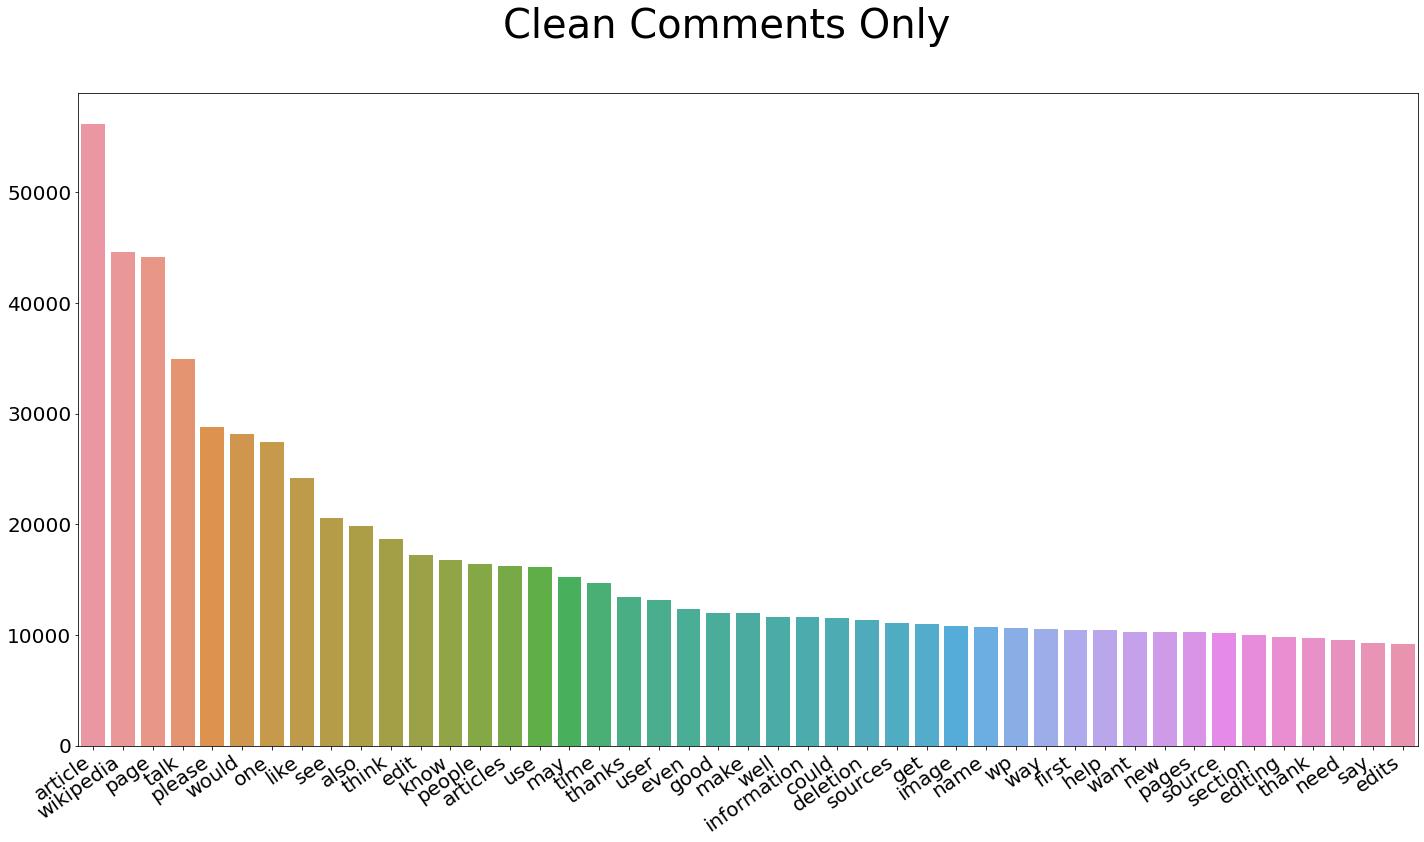

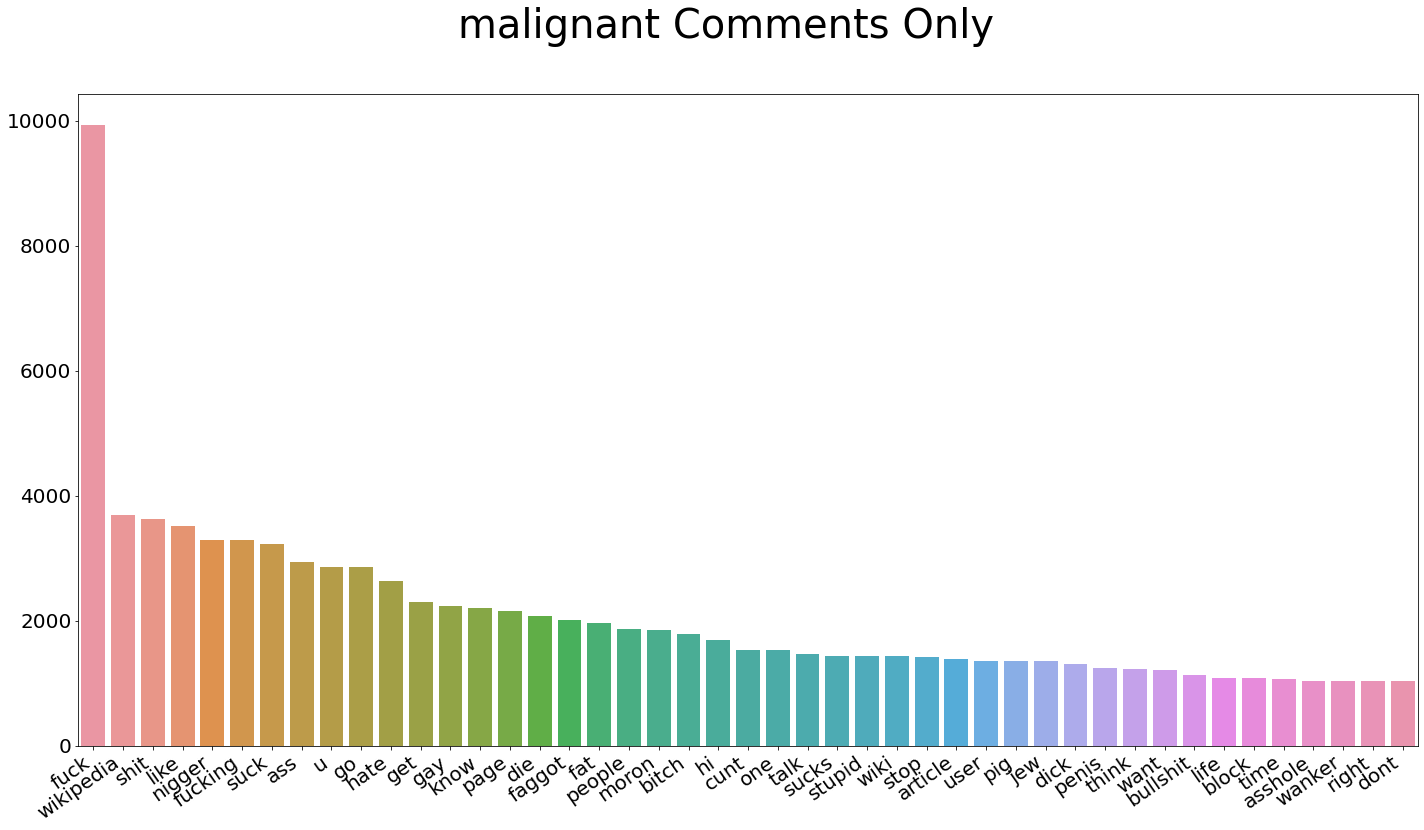

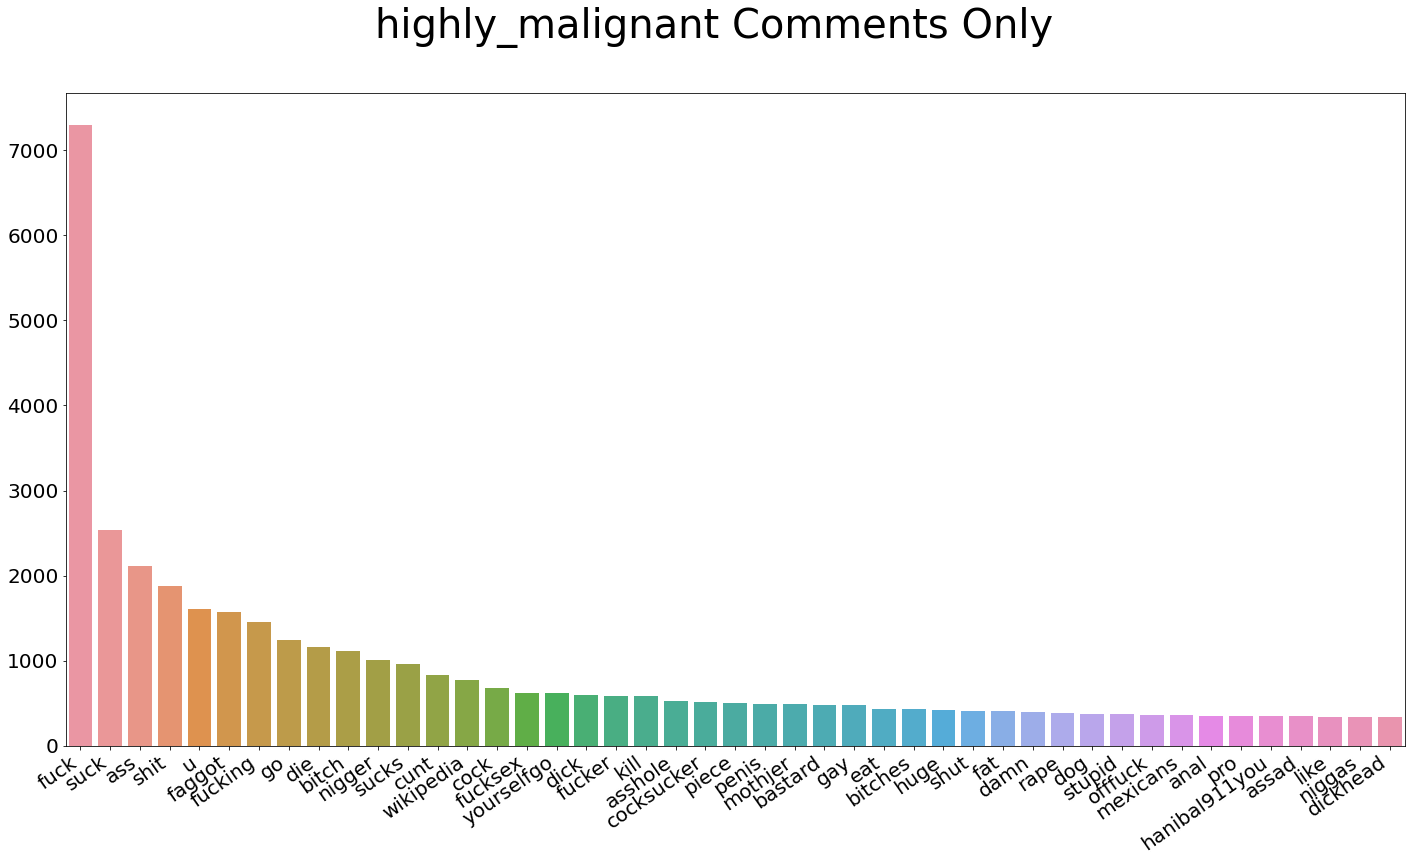

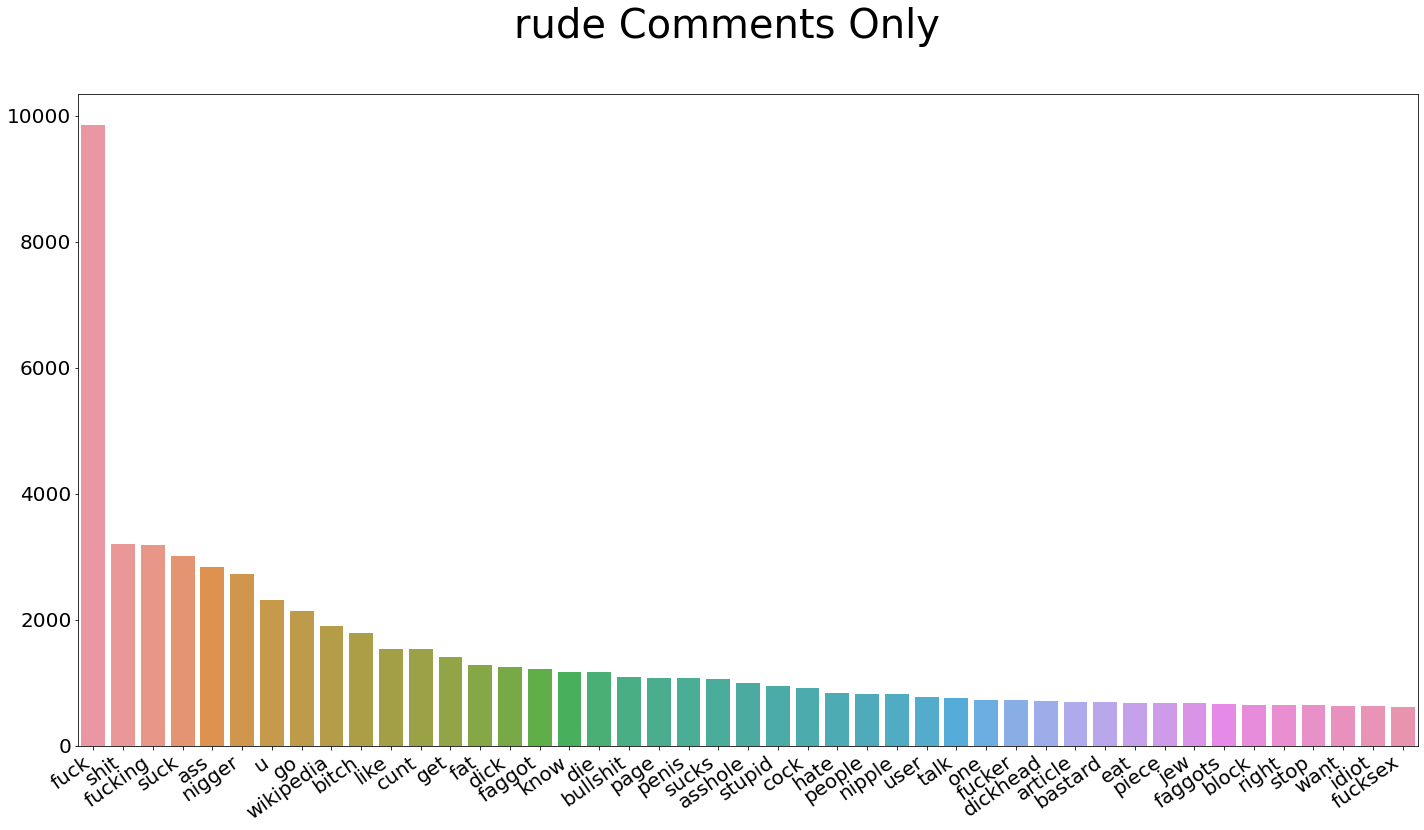

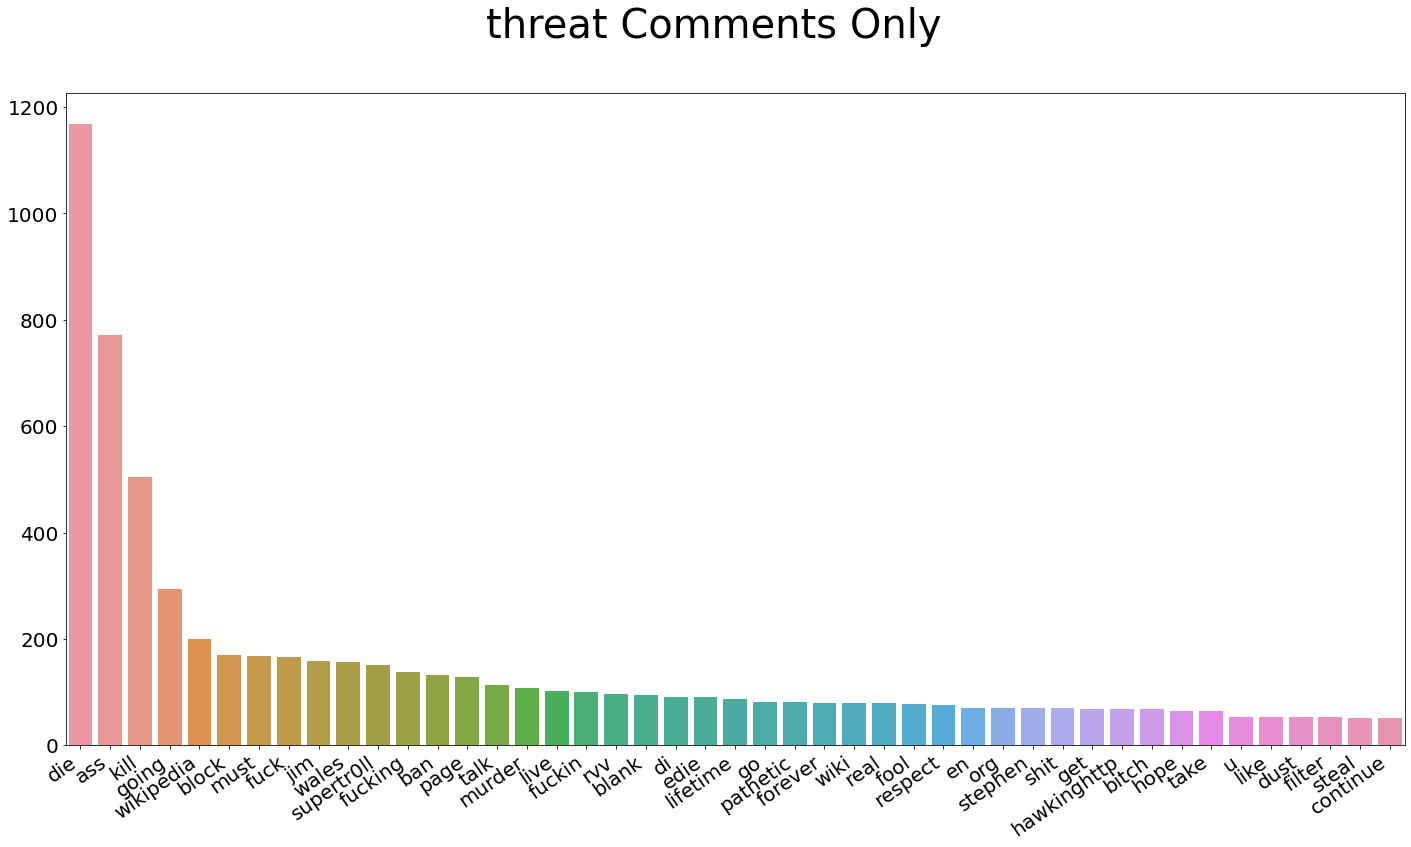

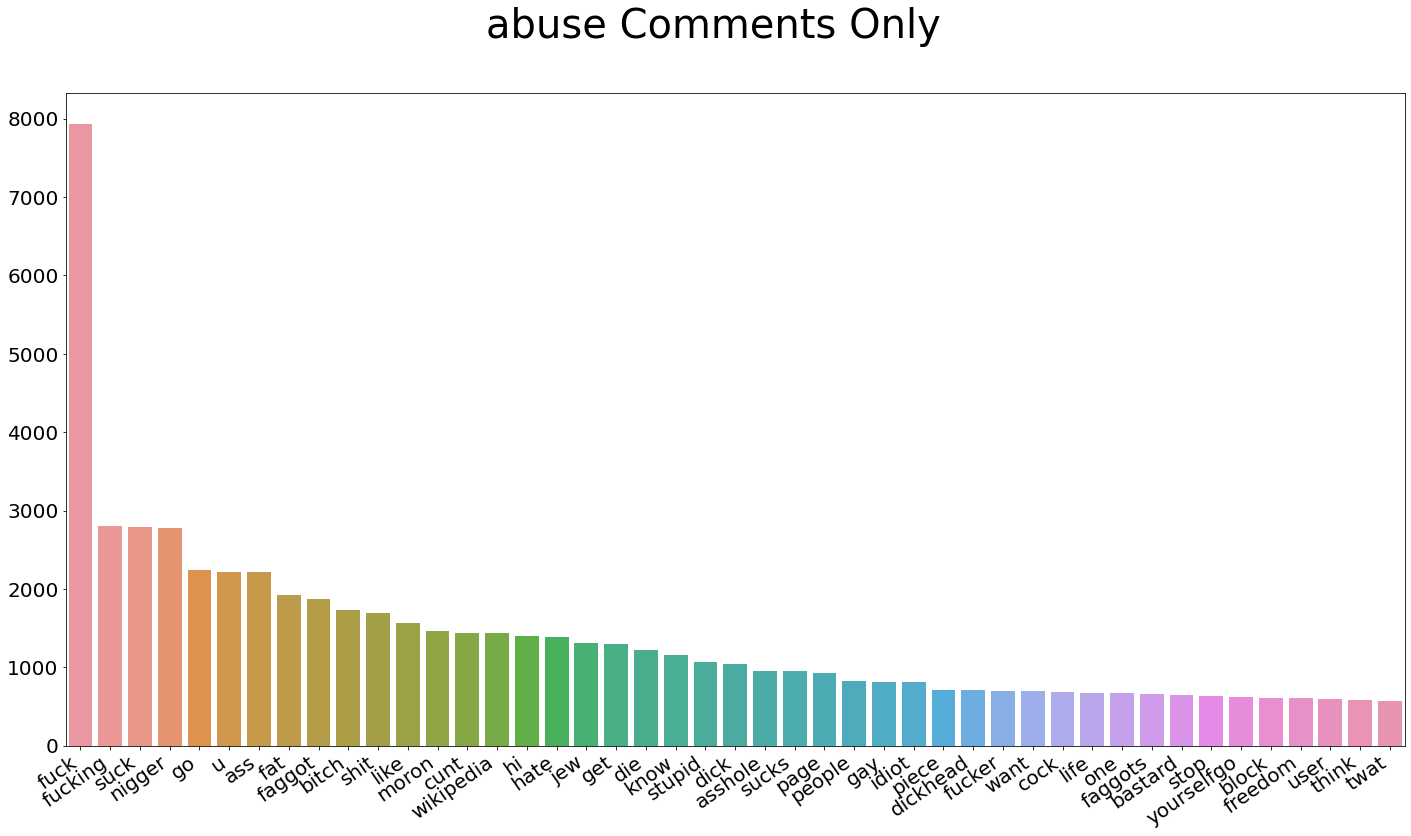

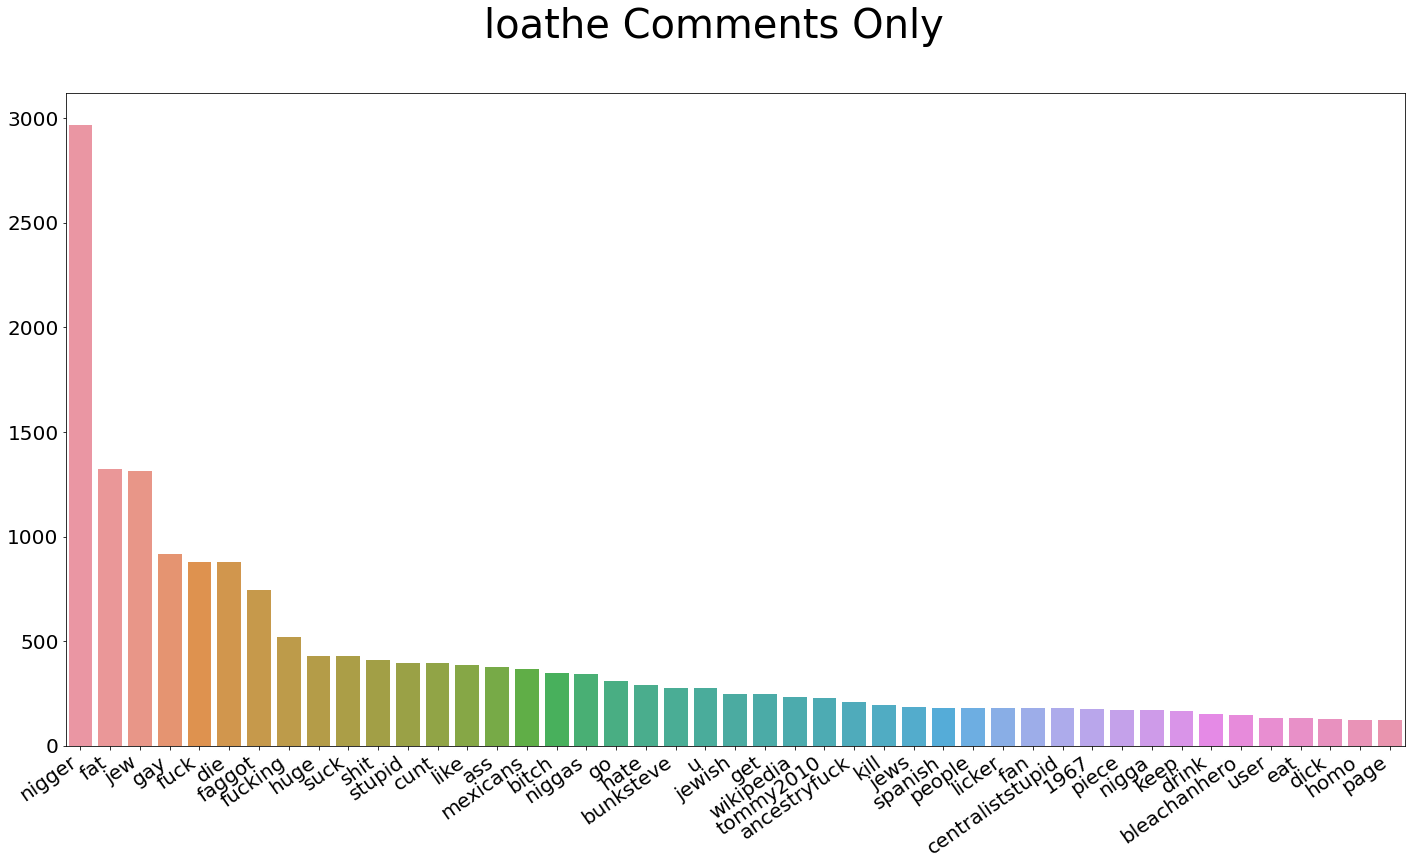

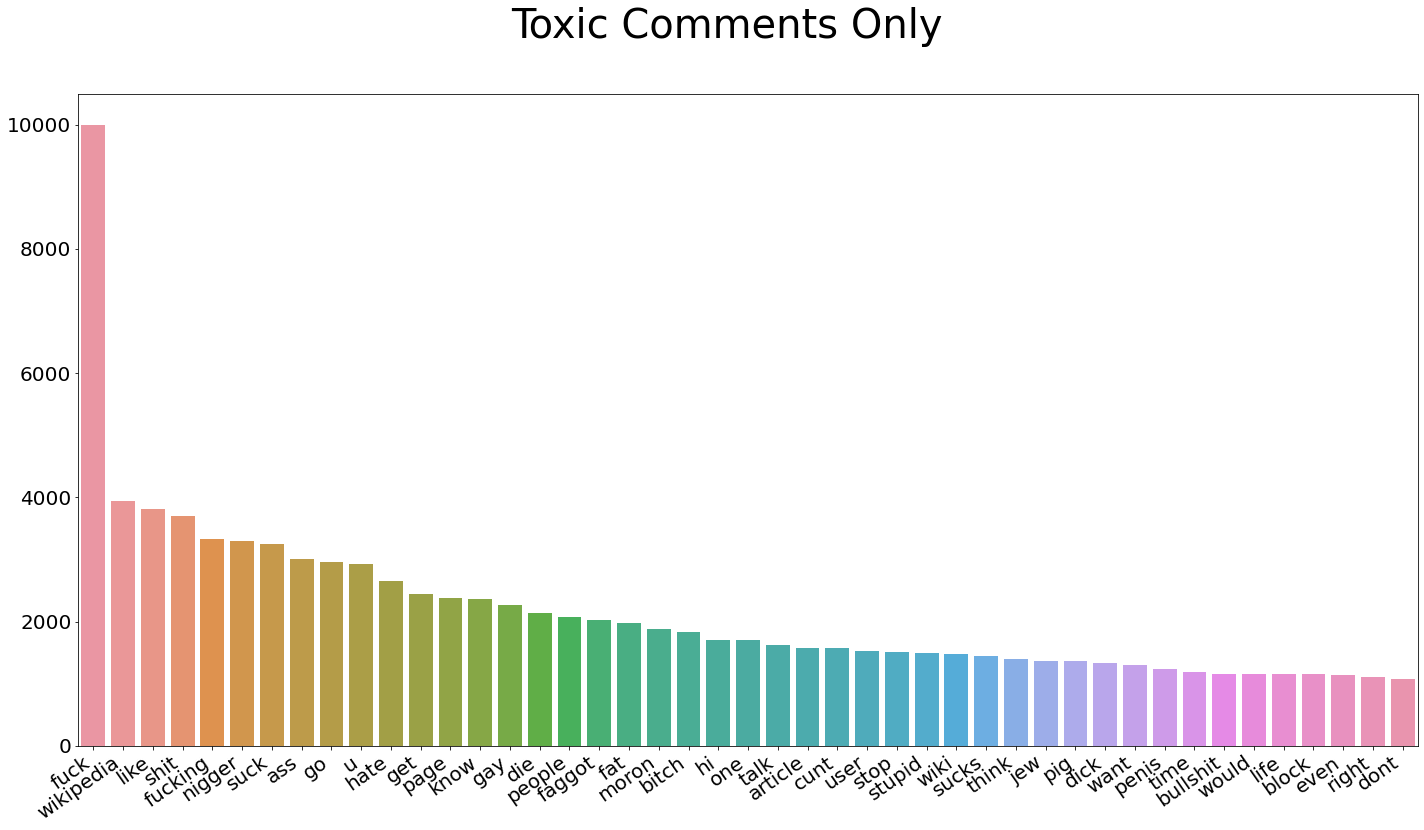

In [39]:
all_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
all_tokenizer.fit_on_texts(data.comment_text[(is_clean==True)])
word_plot(get_word_cnt(all_tokenizer), 45, 'Clean Comments Only')

for label in negative_targets:
    toxic_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
    toxic_tokenizer.fit_on_texts(data.comment_text[(df_targets[label]==1)])
    word_plot(get_word_cnt(toxic_tokenizer), 45, label + ' Comments Only')
    
toxic_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
toxic_tokenizer.fit_on_texts(data.comment_text[(is_clean==False)])
word_plot(get_word_cnt(toxic_tokenizer), 45, 'Toxic Comments Only')